In [932]:
# 1.data preparation 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [934]:
df=pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [935]:
# 2. EDA
df.isnull().sum() #this gives the no of null or missing values in each column, oldpeak has missing values

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [936]:
df.shape # this gives the size of the dataset

(908, 13)

In [939]:
df.info() #gives info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [941]:
df.describe() # gives the sumary statistics of the features

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


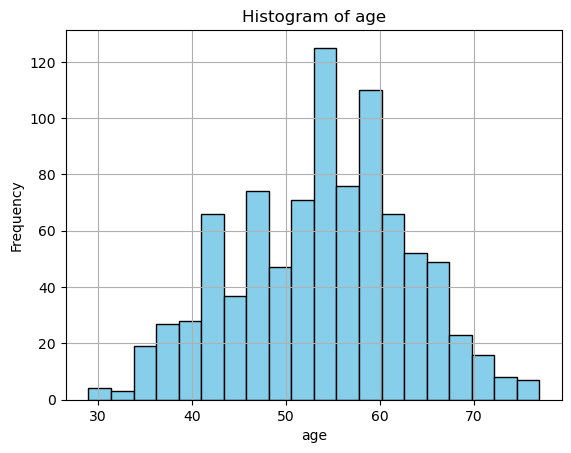

Skewness: -0.14
negatively skewed


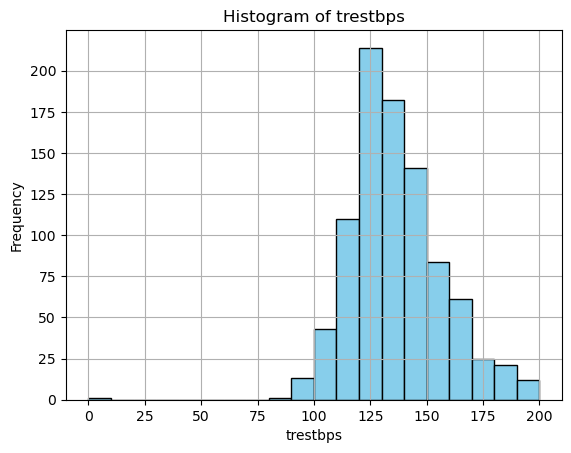

Skewness: 0.35
negatively skewed


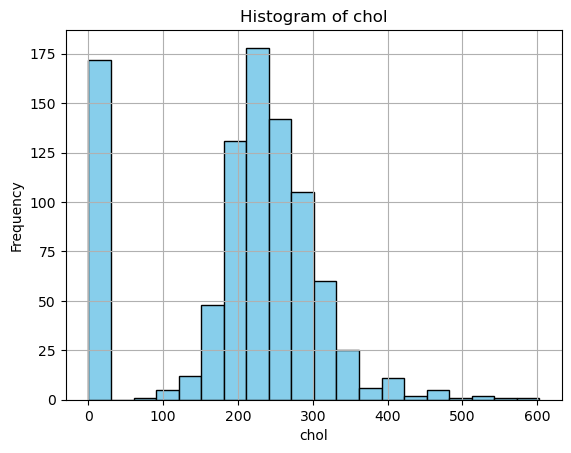

Skewness: -0.56
negatively skewed


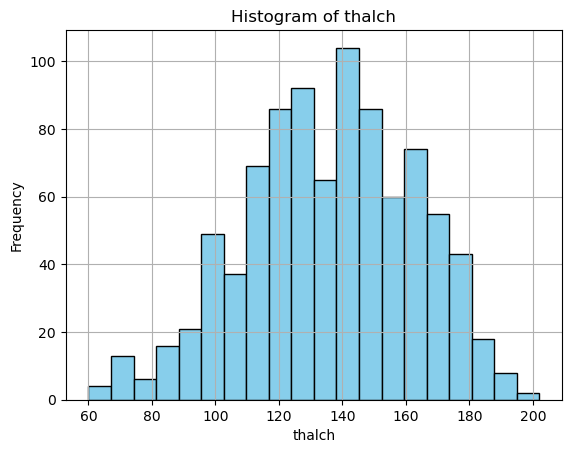

Skewness: -0.22
negatively skewed


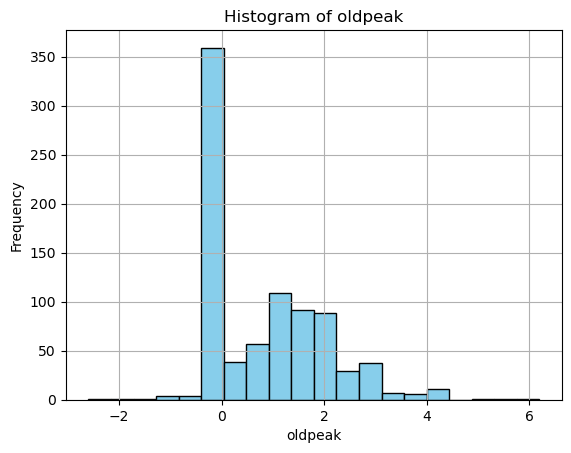

Skewness: nan
negatively skewed


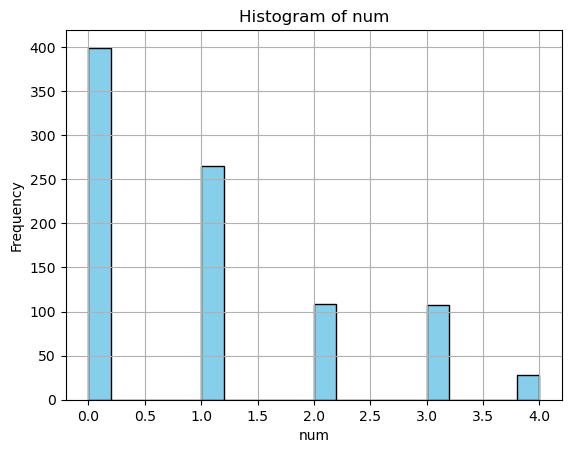

Skewness: 0.95
negatively skewed


In [942]:
# 2.visualizations histograms
from scipy.stats import skew
num_col=df.select_dtypes(include=["number"]).columns
for col in num_col:
    col_skewness = skew(df[col]) #calculating skewness of each histogram
    
    df[col].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
    print(f"Skewness: {col_skewness:.2f}") # printing skewness
    # deterining the skewness(=ve or -ve)
    if col_skewness > 1:
        print("positively skewed")
    else:
        print("negatively skewed")

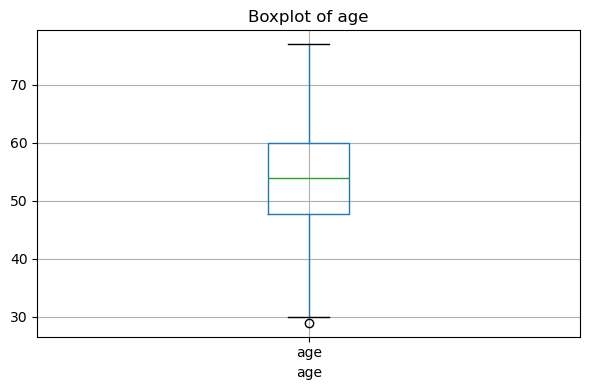

Outliers detected: 1
Lower extreme: 29.375
Upper extreme: 78.375


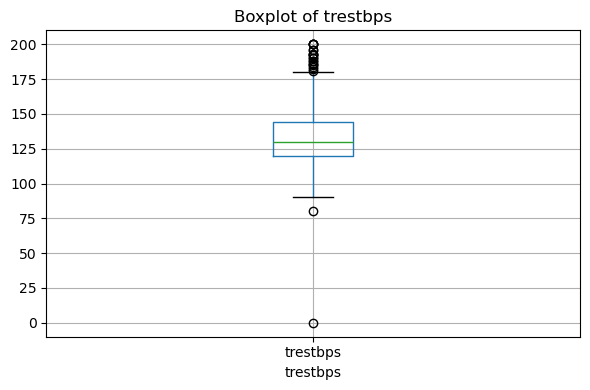

Outliers detected: 22
Lower extreme: 84.0
Upper extreme: 180.0


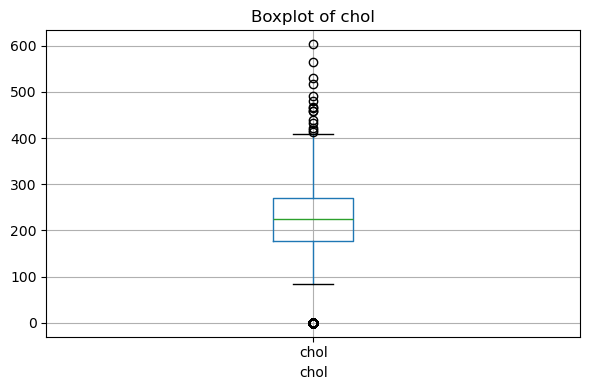

Outliers detected: 187
Lower extreme: 36.875
Upper extreme: 409.875


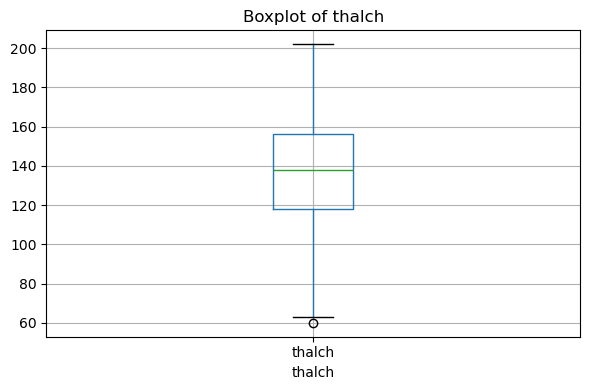

Outliers detected: 1
Lower extreme: 61.0
Upper extreme: 213.0


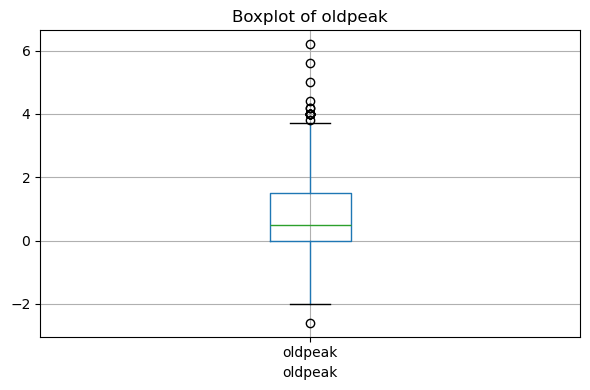

Outliers detected: 16
Lower extreme: -2.25
Upper extreme: 3.75


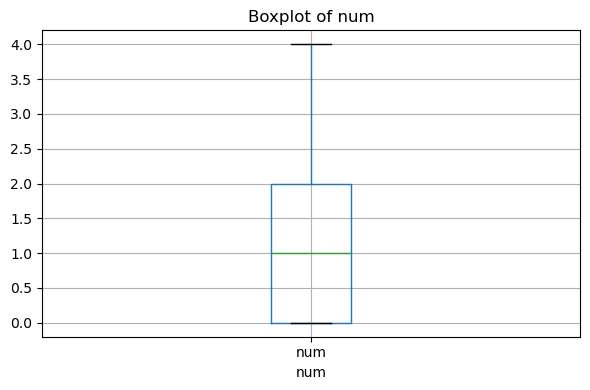

Outliers detected: 0
Lower extreme: -3.0
Upper extreme: 5.0


In [944]:
# boxplots
for col in num_col:
    series = df[col]
  # finding outliers by iqr
    Q1 = series.quantile(0.25) # determining q1
    Q3 = series.quantile(0.75)  # determining q3
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5 * IQR  #deterining lower extreme
    upper_extreme = Q3 + 1.5 * IQR   #deterining upper extreme
    outliers = series[(series < lower_extreme) | (series > upper_extreme)] # determining outliers

    plt.figure(figsize=(6, 4))
    df.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()
    print(f"Outliers detected: {len(outliers)}") #printing no of outliers
    print(f"Lower extreme: {lower_extreme}")
    print(f"Upper extreme: {upper_extreme}")

In [946]:
# 3.Feature engineering
df.loc[:,'fbs']=df.loc[:,'fbs'].astype(object)
cat_col=df.select_dtypes(include=["object"]).columns
cat_col

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [947]:
# converting cat columns to str for label encoding
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str)

In [948]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [949]:
# encoding categorical columns
label=LabelEncoder()
for col in cat_col:
    df[col]=label.fit_transform(df[col])
    

In [950]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,1,2.3,0,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0,0
4,57,1,0,110,201,0,1,126,3,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,1,1.5,2,2,4
904,62,1,0,166,170,0,2,120,3,3.0,1,2,4
905,56,1,2,170,0,0,0,123,3,2.5,0,1,4
906,56,1,2,144,208,1,2,105,2,NaN,0,0,4


In [951]:
# handling missing values
df['oldpeak']=df['oldpeak'].fillna(df['oldpeak'].mean())
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

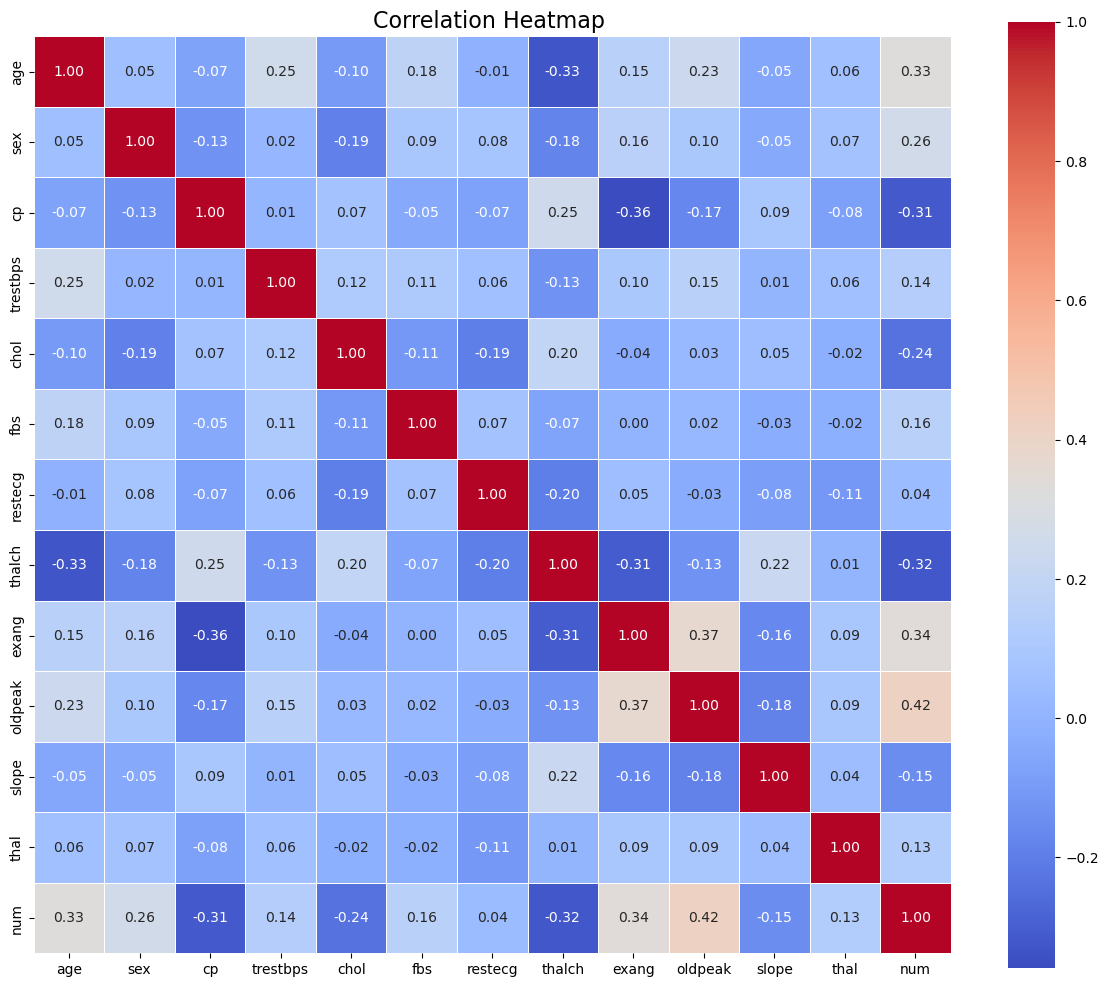

In [952]:
# generating correlation heat maps to explore relationships between pairs of variables.
# Computing the correlation matrix
corr_matrix = df.corr()

# Setting  the matplotlib figure
plt.figure(figsize=(12, 10))

# plotting the heatmap with seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

plt.title("Correlation Heatmap ", fontsize=16)
plt.tight_layout()
plt.show()

In [953]:
#4. Decision Tree Classification:
x=df.drop('num',axis=1) # dividing dependent and independent variables
y=df['num']

In [954]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [955]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [956]:
y_pred=model.predict(x_test) # predicting on test data

In [957]:
print(classification_report(y_test,y_pred)) # classification report

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       124
           1       0.41      0.54      0.46        83
           2       0.18      0.10      0.13        29
           3       0.27      0.10      0.14        31
           4       0.00      0.00      0.00         6

    accuracy                           0.53       273
   macro avg       0.31      0.30      0.29       273
weighted avg       0.49      0.53      0.51       273



In [958]:
# 5. Hyperparameter Tuning:
from sklearn.model_selection import GridSearchCV
params={'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7],'min_samples_split': [2,5,7,10]}
grid=GridSearchCV(model,params)
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}

In [960]:
# 6. Model Evaluation and Analysis:
# deploying the model with best params provided by grid search.
fmodel=DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=2)
fmodel.fit(x_train,y_train)
fy_pred=fmodel.predict(x_test)
print(classification_report(y_test,fy_pred)) # classification report

              precision    recall  f1-score   support

           0       0.70      0.83      0.76       124
           1       0.43      0.58      0.49        83
           2       0.00      0.00      0.00        29
           3       0.47      0.23      0.30        31
           4       0.00      0.00      0.00         6

    accuracy                           0.58       273
   macro avg       0.32      0.33      0.31       273
weighted avg       0.50      0.58      0.53       273



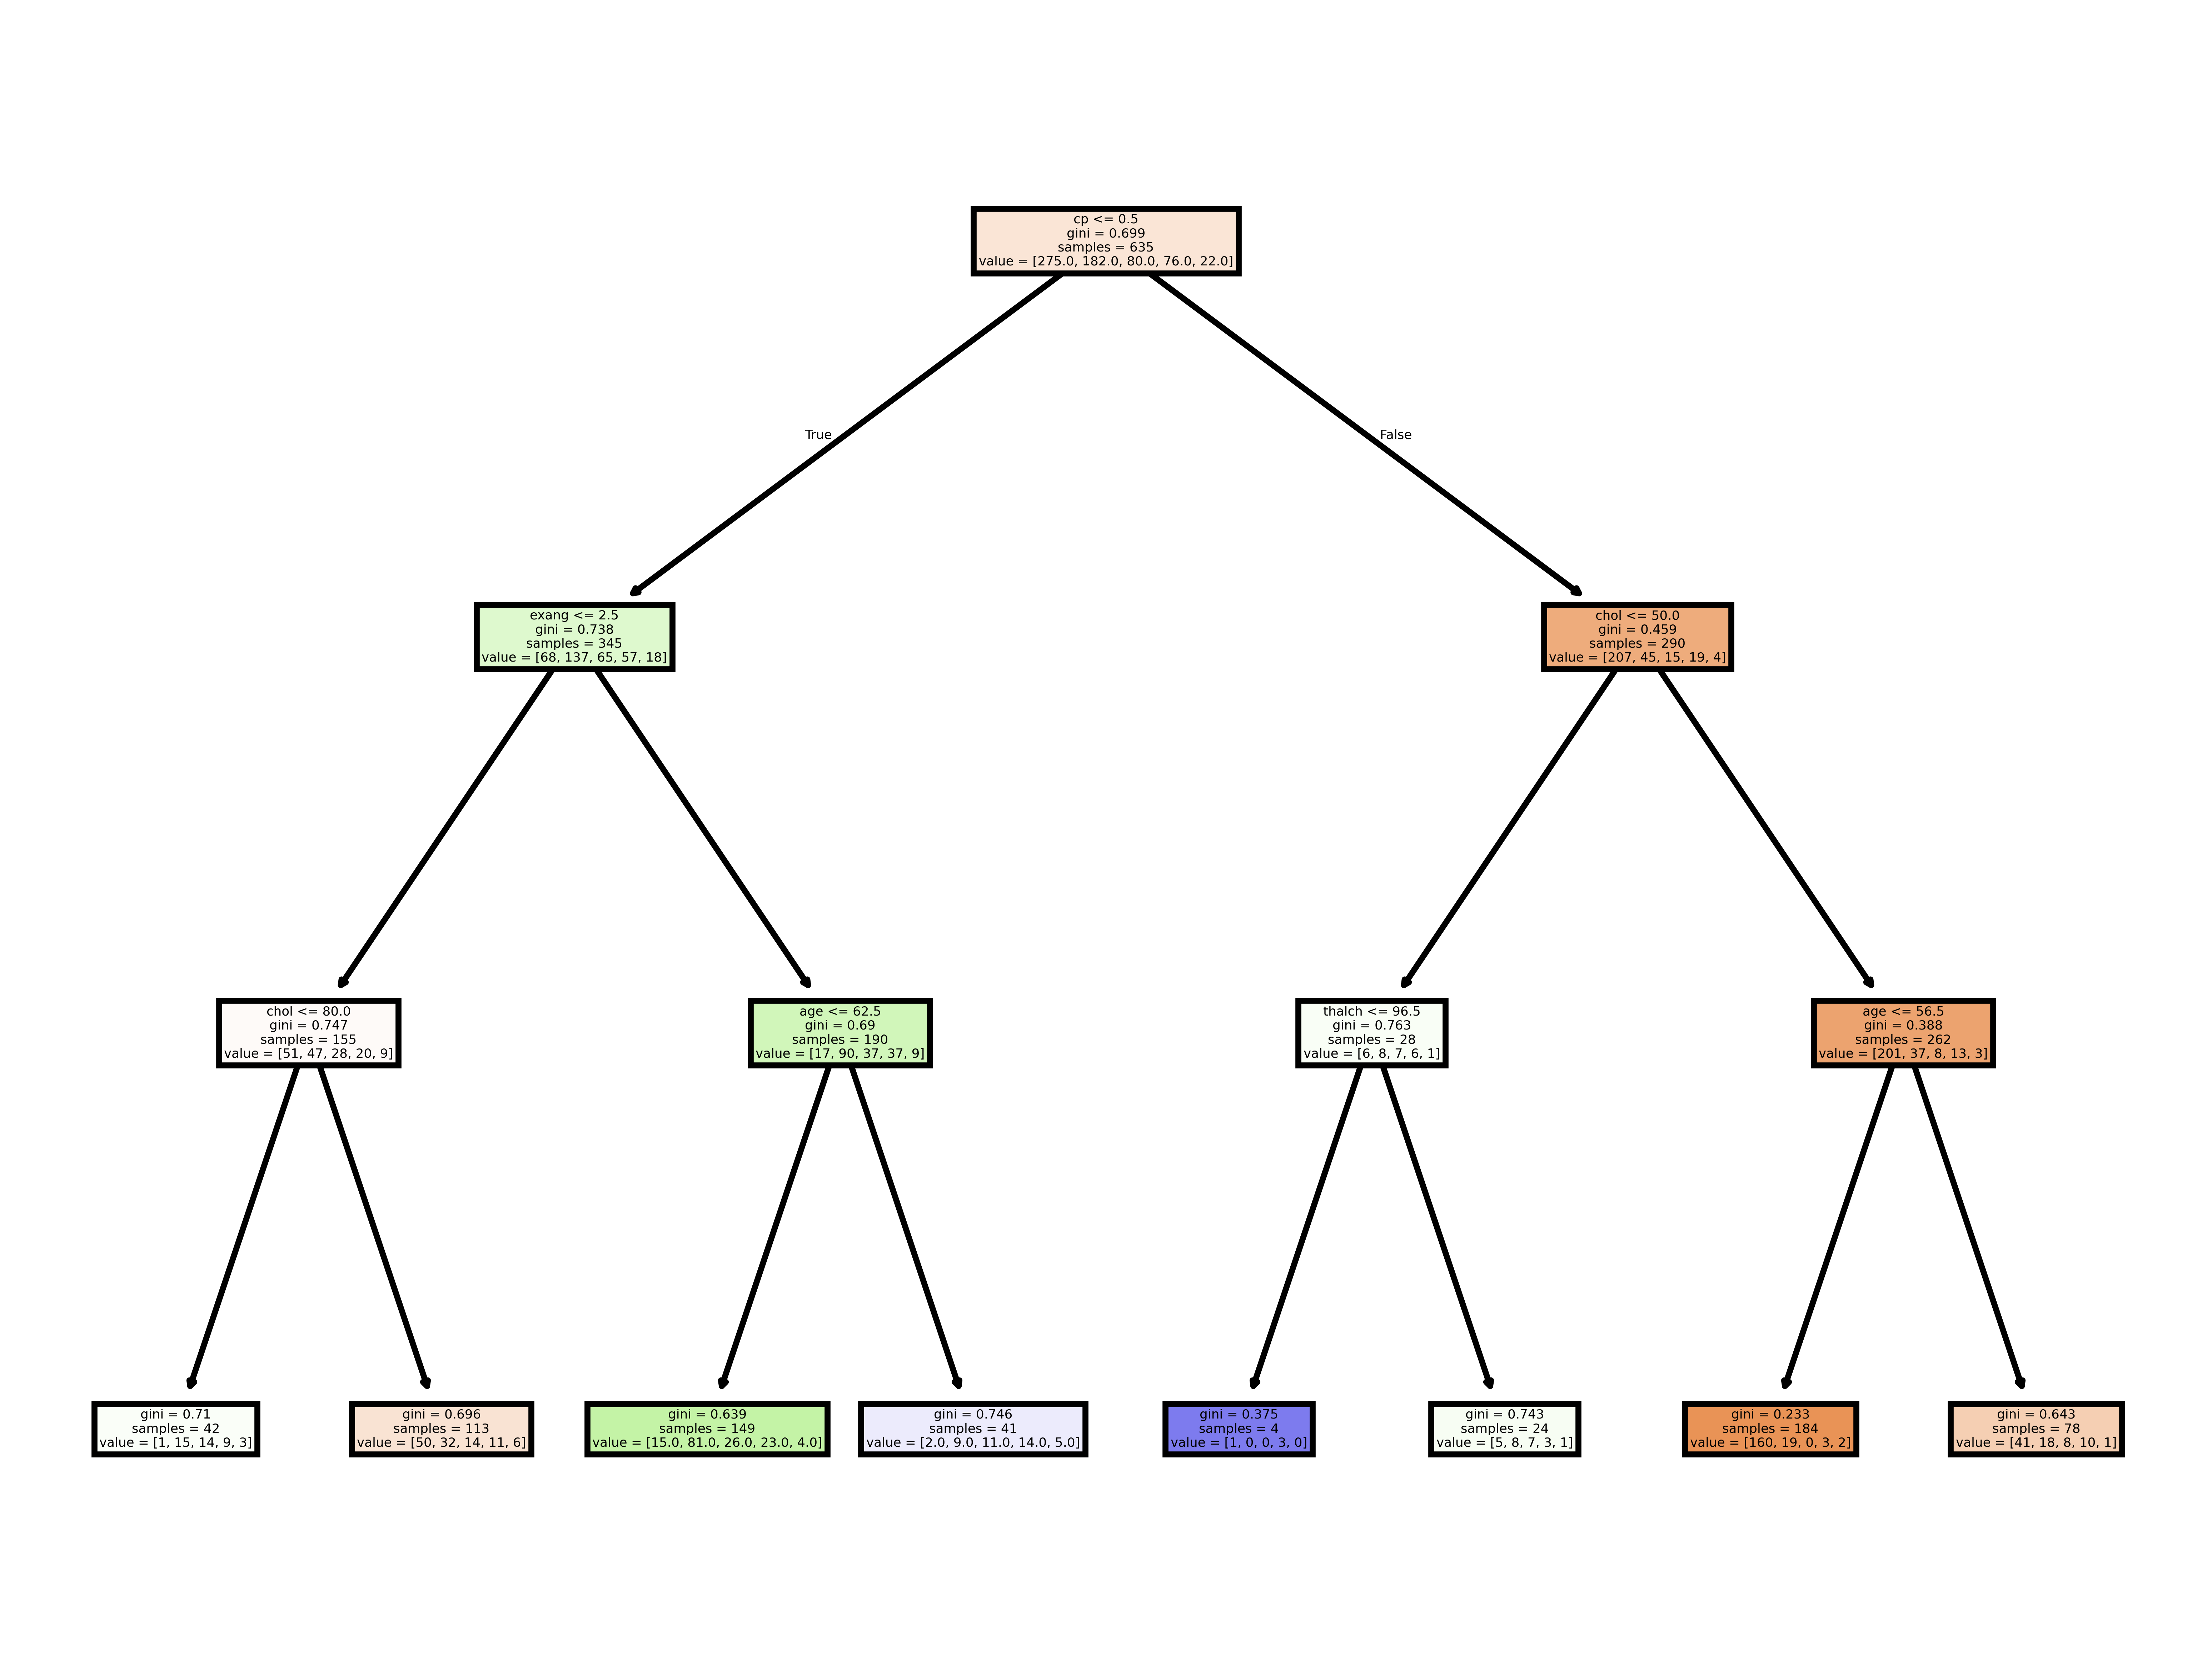

In [961]:
# visualizing the decision tree
fn=['age','sex','cp','trestbps','chol','fbs','restecg','thalch','exang','oldpeak','slope','thal']
plt.figure(dpi=1200)
tree.plot_tree(fmodel,feature_names=fn,filled=True)
plt.show()


In [962]:
# interview question
# 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
# there are 3 common hyperparameters of decision tree model and they are:
# 1.max_depth: Limits tree depth , it prevents overfitting by restricting complexity.
# 2.min_samples_split: Minimum samples to split a node, higher values prevent small splits by reducing overfitting.
# 3.min_samples_leaf: Minimum samples per leaf, larger leaves reduce overfitting. 
# 4.criterion: Split quality metric (e.g., gini, entropy), affects purity of nodes.

#2. What is the difference between the Label encoding and One-hot encoding?
# Label Encoding Converts categories into integer labels, whereas one hot encoding converts  categories into binary columns, if you have a categorical column with more than 5 classes go for label encoding or else you can use one hot encoding.